Generating New Returning chart...


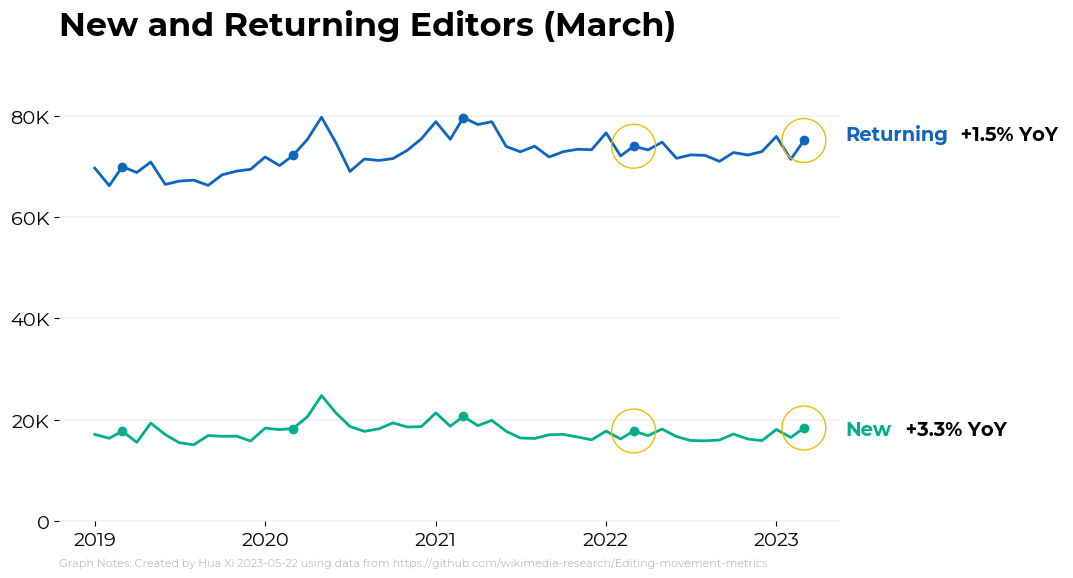

In [1]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import os
#local
#from wikicharts import Wikichart, wmf_colors
#jupyter notebook
%run wikicharts.ipynb

def main():
    #print update
    print("Generating New Returning chart...")

    #---PARAMETERS---
    #current path
    home_dir = os.getcwd()
    #where file is saved
    outfile_name = "New_Returning.png"
    save_file_name = home_dir + "/charts/" + outfile_name
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    #read in data
    try:
        df = pd.read_csv(data_path, sep='\t')
    except:
        df = pd.read_csv(home_dir + '/resources/data/editor_metrics.tsv', sep='\t')
    start_date = "2019-01-01"
    end_date = datetime.today()
    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]

    #---PREPARE TO PLOT
    key = pd.DataFrame([['Returning',wmf_colors['blue']],
        ['New',wmf_colors['green50']]],
        index=['returning_active_editors','new_active_editors'],
        columns=['labelname','color'])

    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width=12)
    chart.plot_line('month','returning_active_editors',key.loc['returning_active_editors','color'])
    chart.plot_line('month','new_active_editors',key.loc['new_active_editors','color'])
    chart.plot_monthlyscatter('month','returning_active_editors',key.loc['returning_active_editors','color'])
    chart.plot_monthlyscatter('month','new_active_editors',key.loc['new_active_editors','color'])
    chart.plot_yoy_highlight('month','returning_active_editors')
    chart.plot_yoy_highlight('month','new_active_editors')
    chart.format(title = f'New and Returning Editors',
        radjust=0.75,
        data_source="https://github.com/wikimedia-research/Editing-movement-metrics")
    chart.multi_yoy_annotate(['returning_active_editors','new_active_editors'],key,chart.calc_yoy,xpad=10)
    chart.finalize_plot(save_file_name,display=display_flag)


if __name__ == "__main__":
    main()